> # **Introduction**

***This is my version of the Google Data Analytics Capstone - Case Study 1.***

> Welcome to the Cyclistic bike-share analysis case study! 
> In this case study, we will perform many real-world tasks of a junior data analyst working in the marketing analyst team at a fictional company, Cyclistic, a bike-share company in Chicago. In order to answer the key business questions, you will follow the steps of the data analysis process: ask, prepare, process, analyze,
> share, and act.


> # **Ask**

***For the ask step first let's some context for the cyclistic document:***

***Company, Stakeholder and Teams:***

* ***Cyclistic:*** A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.
* ***Lily Moreno:*** The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
* ***Cyclistic marketing analytics team:*** A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.
* **Cyclistic executive team:** The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

***Guiding Questions:***
> ***What is the problem you are trying to solve?***

We are simply trying to find the answer to the question How do annual members and casual riders use Cyclistic bikes differently?

The main goal of the company is to convert maximum number of casual customers to annual members and thus, increase the profits. In order to achieve this, we need to design marketing strategies. For this, we first need to understand the fundamental differences between annual members and casual riders.
> ***How can your insights drive business decisions?***

The insights will help the marketing team to increase annual members.

> # **Prepare**

The project will use the data provided by [this kaggle dataset](https://www.kaggle.com/datasets/rajamit34/capstone-case-study-cyclistic-bikeshare-analysis). But Google also provided their [own link](https://divvy-tripdata.s3.amazonaws.com/index.html) with the same dataset but expanded with more years and station descriptions.

***The main data source is 12 months (Between april 2021 and march 2022) of riding data provided by the Cicylistic company.***


***Guiding Questions:***

> ***Where is your data located?***

The data is located in the kaggle dataset. Also, one can find the dataset on the following link : https://divvy-tripdata.s3.amazonaws.com/index.html

> ***How is the data organized?***

The data is in .csv format and each .csv file has a whole month of data .

> ***Are there issues with bias or credibility in this data? Does your data ROCCC?*** 

There is no issue of the bias or credibility as the data is generated by the company itself from their customers. And finally, it's ROCCC because it's reliable, original, comprehensive, current and cited.

> ***How are you addressing licensing, privacy, security, and accessibility?***

The company has their own licence over the dataset. Besides that, the dataset doesn't have any personal information about the riders.

> ***How did you verify the data’s integrity?***

All the files have consistent data, alongwith same columns and all columns have the correct data type.

> ***How does it help you answer your question?***

It may have some key insights about the riders and their riding style.

> ***Are there any problems with the data?***

The common problem with data is that it has null values, still it is good enough to get the insights.

> # **Process**

***In this phase, we prepare the data for the further analysis.***


In [1]:
# We are using R for this case study.
# Loading the required packages for this analysis

library(tidyverse) 
library(lubridate)
library(readr)
library(dplyr)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# As there are multiple .csv files, so we n eed to concatenate into one dataframe.

csv_files <- list.files(path = "../input/capstone-case-study-cyclistic-bikeshare-analysis", recursive = TRUE, full.names=TRUE)

combined_cyclistic <- do.call(rbind, lapply(csv_files, read.csv))

In [3]:
# After concatenation, the final dataframe names as combined_cyclistic.

head(combined_cyclistic)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member
2,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual
3,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
4,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member
5,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
6,097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual


# >  *Data cleaning process:*

In [4]:
# Firstly we have to remove duplicates fron the dataset.

combined_cyclistic <- mutate(distinct(combined_cyclistic))

In [5]:
# We have have to phase the date-time cloumns because they in string format, so to make is consistant we convert it into date-time format.

combined_cyclistic$started_at <- as.POSIXct(combined_cyclistic$started_at, "%y-%m-%d %H:%M:%S")
combined_cyclistic$ended_at <- as.POSIXct(combined_cyclistic$ended_at, "%y-%m-%d %H:%M:%S")

head(combined_cyclistic)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member
2,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual
3,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
4,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member
5,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
6,097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual


# >  *Data manipulation process:*
***We will add certain new columns as the help us in the analyze phase.***

In [6]:
# We include a column as ride_time, which will represents the total time of a bike ride in minutes.

combined_cyclistic <- combined_cyclistic%>%
mutate(ride_time = as.numeric(combined_cyclistic$ended_at - combined_cyclistic$started_at) / 60)

combined_cyclistic$ride_time <- round(combined_cyclistic$ride_time, digit = 2)
head(combined_cyclistic)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,31.32
2,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,64.30
3,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,5697.65
4,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,25.10
5,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,91.28
6,097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual,0.68


In [7]:
# Also include a column as day_of_week, so that we can analyze the pattern for each day.

combined_cyclistic <- combined_cyclistic %>%
mutate(day_of_week = wday(combined_cyclistic$started_at, label = TRUE))

head(combined_cyclistic)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,day_of_week
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>
1,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,31.32,Mon
2,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,64.30,Tue
3,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,5697.65,Sat
4,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,25.10,Sat
5,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,91.28,Sat
6,097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual,0.68,Sun


In [8]:
# Again we include a column as start_hour, so that we can analyze intra day ride pattern.

combined_cyclistic <- combined_cyclistic %>%
mutate(start_hour = hour(combined_cyclistic$started_at))

head(combined_cyclistic)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,day_of_week,start_hour
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>,<int>
1,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,31.32,Mon,18
2,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,64.30,Tue,17
3,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,5697.65,Sat,12
4,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,25.10,Sat,9
5,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,91.28,Sat,12
6,097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual,0.68,Sun,18


# > *Cleaning Process is completed:*
> ***Now we save the cleaned dataset for further analysis.***

In [9]:
# We save the cleaned dataset in .csv file.
combined_cyclistic %>%
write.csv("final_cyclistic_data")

***Guiding questions:***

> ***What tools are we choosing and why?***

I'm using R for this project, for two main reasons: Because of the large dataset and to gain experience with the language.

> ***Have you ensured your data’s integrity?***

Yes, the data is consistent throughout the columns.

> ***What steps have you taken to ensure that your data is clean?***

First the duplicated values where removed, then the columns where formatted to their correct format.

> ***How can you verify that your data is clean and ready to analyze?***

I will discuss and show the notebook to my other team member, the procees i took to clean tha data and verify that.

> ***Have you documented your cleaning process so you can review and share those results?***

Yes, it's all documented in this R notebook.

> # **Analyze**

* ***Here, we will analyze the cleaned data and we will try to get insights from it with the help of visualization.***
* ***The data exploration will consist of building a profile for annual members and how they differ from casual riders.***


In [10]:
# To quick start, let's generate a summary of the dataset

summary(combined_cyclistic)


   ride_id          rideable_type        started_at                 
 Length:5723532     Length:5723532     Min.   :2021-04-01 00:03:18  
 Class :character   Class :character   1st Qu.:2021-06-22 15:20:26  
 Mode  :character   Mode  :character   Median :2021-08-17 18:25:49  
                                       Mean   :2021-08-26 22:25:18  
                                       3rd Qu.:2021-10-14 19:48:10  
                                       Max.   :2022-03-31 23:59:47  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-04-01 00:14:29   Length:5723532     Length:5723532    
 1st Qu.:2021-06-22 15:47:37   Class :character   Class :character  
 Median :2021-08-17 18:44:32   Mode  :character   Mode  :character  
 Mean   :2021-08-26 22:46:50                                        
 3rd Qu.:2021-10-14 20:03:28                                        
 Max.   :2022-04-01 22:10:12      

***Things that immediately catches the attention is ride_time:***

This field has negative values, and the biggest value is 55944.15, which is approx 39 days. 

# > *Data distribution*

> ***Here we want to try to answer the most basic questions about how the data is distributed.***

In [11]:
# Data distribution by member riders Vs casual riders.
combined_cyclistic %>%
group_by(member_casual) %>%
summarise(total_count = length(ride_id),
         total_percentage = (length(ride_id) / nrow(combined_cyclistic)* 100))

member_casual,total_count,total_percentage
<chr>,<int>,<dbl>
casual,2546542,44.49249
member,3176990,55.50751


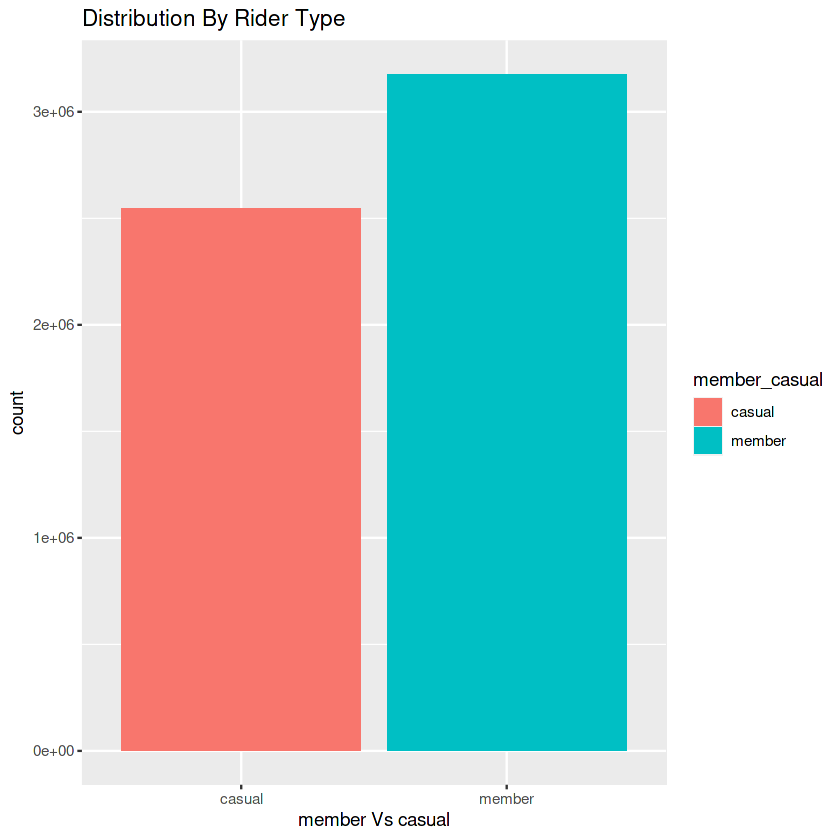

In [12]:
# Now lets plot the bar chart for clear understanding of rider distribution pattern on member types.
ggplot(combined_cyclistic, aes(member_casual, fill = member_casual)) + 
geom_bar() + 
labs(x = "member Vs casual", title = "Distribution By Rider Type")

> ***As we can see on the "member Vs casual" table, member riders have a bigger proportion of the dataset, composing approx 55.5%, approx 10% bigger than the casual riders.***

In [13]:
# Data distribution by day of week.
combined_cyclistic %>%
group_by(day_of_week) %>%
summarise(total_count = length(ride_id),
         total_percentage = (length(ride_id) / nrow(combined_cyclistic)* 100),
         member_percent = (sum(member_casual == "member") / length(ride_id) * 100),
         casual_percent = (sum(member_casual == "casual") / length(ride_id) * 100),
         percent_difference = member_percent - casual_percent)

day_of_week,total_count,total_percentage,member_percent,casual_percent,percent_difference
<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Sun,870582,15.21057,44.53825,55.46175,-10.92350
Mon,732431,12.79684,59.99678,40.00322,19.99356
Tue,766474,13.39163,63.94203,36.05797,27.88405
Wed,786338,13.73868,63.57775,36.42225,27.15550
Thu,768966,13.43517,61.81470,38.18530,23.62939
Fri,817395,14.28130,55.43379,44.56621,10.86757
Sat,981346,17.14581,43.95300,56.04700,-12.09400


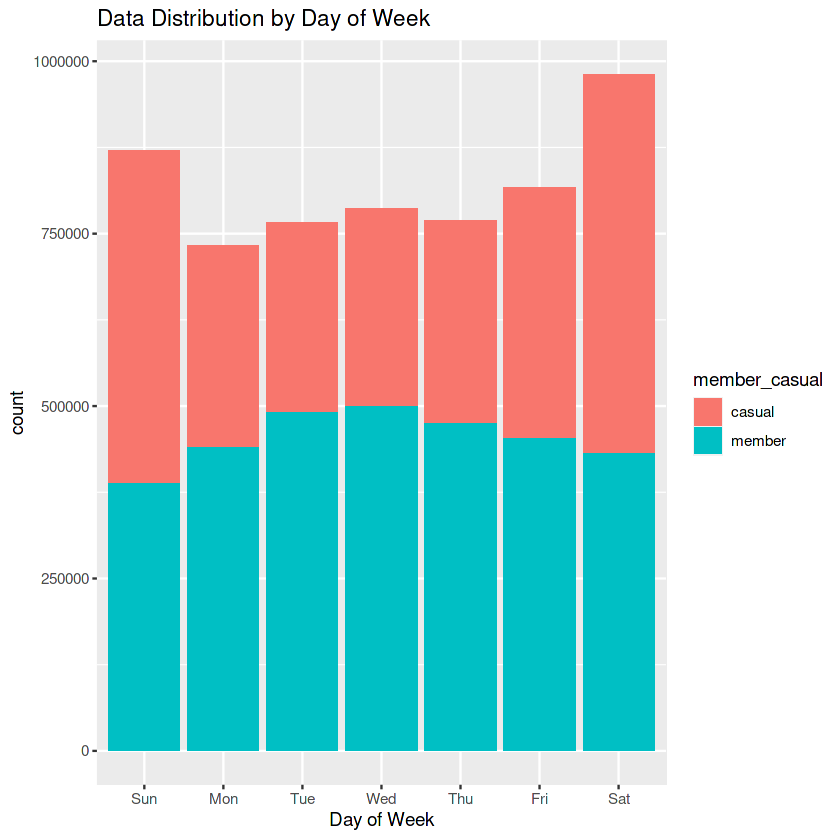

In [14]:
# Now lets plot the bar chart for clear understanding of riding distribution pattern on week days.
ggplot(combined_cyclistic, aes(day_of_week, fill = member_casual)) +
geom_bar() + labs(x = "Day of Week", title = "Data Distribution by Day of Week")

# > *It's interesting to see:*
* ***The biggest volume of data is on the weekend (saturday and sunday).***
* ***Saturday has the biggest data points.***
* ***Member riders have the biggest volume of data on workdays(monday to friday).***
* ***Casual riders have the biggest volume of data on weekends.***
* ***Casual riders have approx 10% to 12% increase in the volume of data on weekends.***


In [15]:
# Data distribution by ride starting hour.
combined_cyclistic %>%
group_by(start_hour) %>%
summarise(total_count = length(ride_id),
         total_percentage = (length(ride_id) / nrow(combined_cyclistic)* 100),
         member_percent = (sum(member_casual == "member") / length(ride_id) * 100),
         casual_percent = (sum(member_casual == "casual") / length(ride_id) * 100),
         percent_difference = member_percent - casual_percent)

start_hour,total_count,total_percentage,member_percent,casual_percent,percent_difference
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,88315,1.5430157,38.72275,61.27725,-22.55449244
1,62297,1.0884363,36.39341,63.60659,-27.21318844
2,39138,0.6838085,33.41254,66.58746,-33.17491952
3,21888,0.3824212,34.50292,65.49708,-30.99415205
4,18605,0.3250615,46.04676,53.95324,-7.90647675
5,44682,0.7806718,71.21884,28.78116,42.43767065
6,111082,1.9407946,76.25268,23.74732,52.50535640
7,206587,3.6094321,76.67036,23.32964,53.34072328
8,250379,4.3745540,73.91914,26.08086,47.83827717


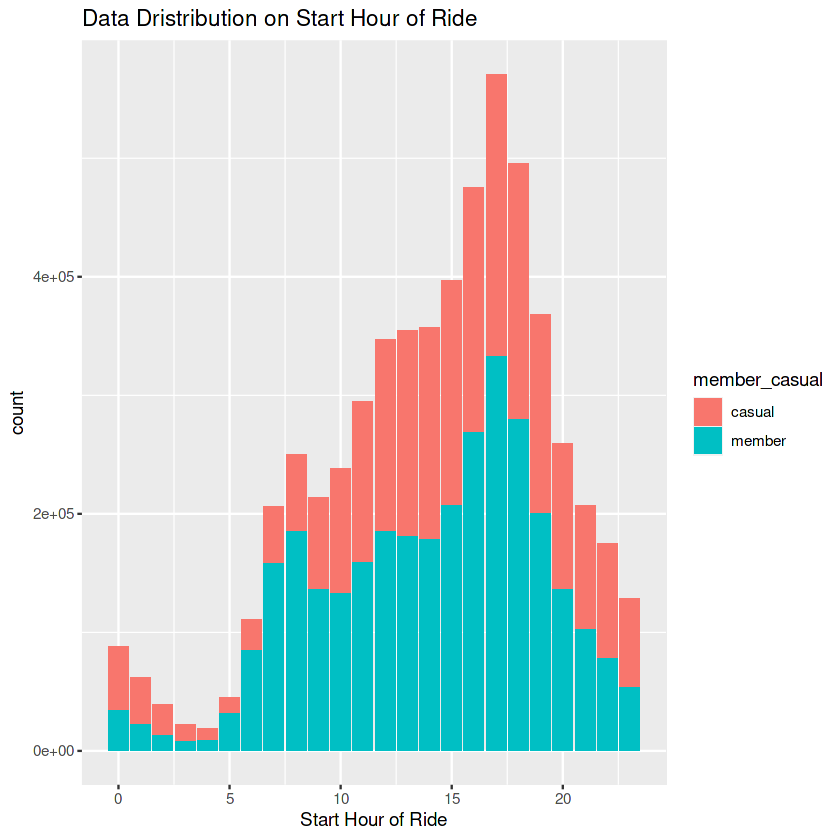

In [16]:
# Now lets plot the bar chart for clear understanding of riding distribution pattern on starting hour of ride in a day.
ggplot(combined_cyclistic, aes(start_hour, fill = member_casual)) +
geom_bar() + labs(x = "Start Hour of Ride", title = "Data Dristribution on Start Hour of Ride")

# > *From this graph, we can see:*
* ***There's a bigger volume of rider in the afternoon to evening.***
* ***The biggest volume of rider in the evening arround 5pm.***
* ***We have more member riders during the morning, mainly in between 5am and 12pm.***
* ***And more casual riders during night, mainly between 11pm and 4am.***

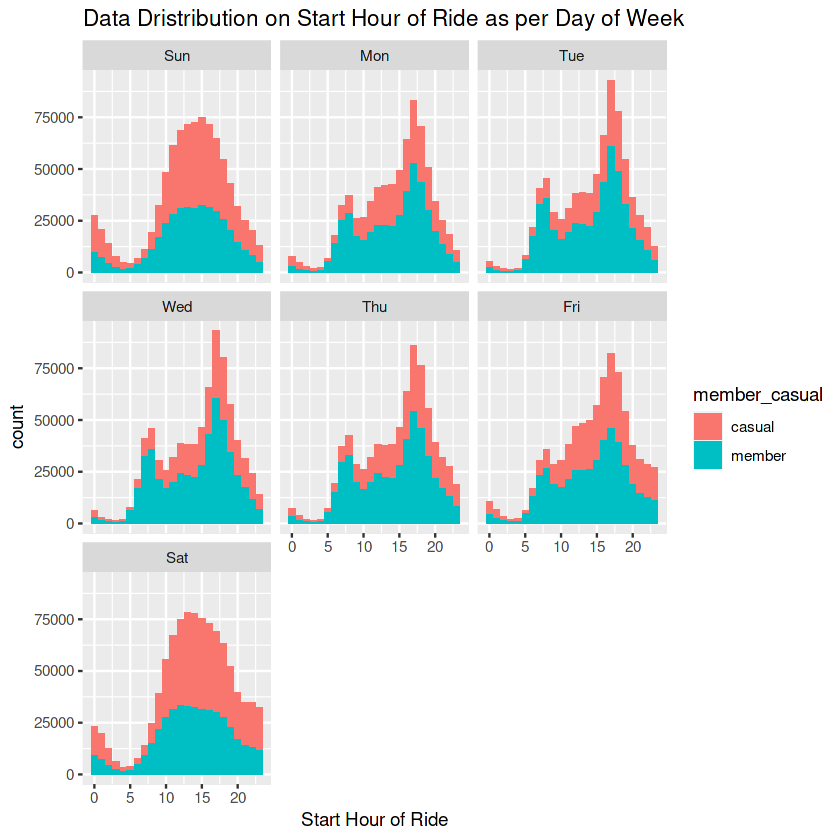

In [17]:
# Above chart can be expanded by day of the week to seen the more indepth pattern of data distributed bye starting hour of ride.
ggplot(combined_cyclistic, aes(start_hour, fill = member_casual)) +
geom_bar() + labs(x = "Start Hour of Ride", title = "Data Dristribution on Start Hour of Ride as per Day of Week") +
facet_wrap(~ day_of_week)

# > *The graph differs on some key ways:*
* ***There's a clear diferrence between the workdays and weekends.***
* ***While the weekends have a smooth flow of data points, the workdays have a more steep flow of data.***
* ***There's a big increase of data points in the workdays between 6am to 8am and another big increase is from 5pm to 6pm.***
* ***On weekend we have a bigger flow of casual riders between 11am to 6pm.***


In [18]:
# Data distribution by types of bike.
combined_cyclistic %>%
group_by(rideable_type) %>%
summarise(total_count = length(ride_id),
         total_percentage = (length(ride_id) / nrow(combined_cyclistic)* 100),
         member_percent = (sum(member_casual == "member") / length(ride_id) * 100),
         casual_percent = (sum(member_casual == "casual") / length(ride_id) * 100),
         percent_difference = member_percent - casual_percent)

rideable_type,total_count,total_percentage,member_percent,casual_percent,percent_difference
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
classic_bike,3250691,56.795192,61.31152,38.68848,22.623036
docked_bike,303989,5.311213,0.00000,100.00000,-100.000000
electric_bike,2168852,37.893594,54.58842,45.41158,9.176836


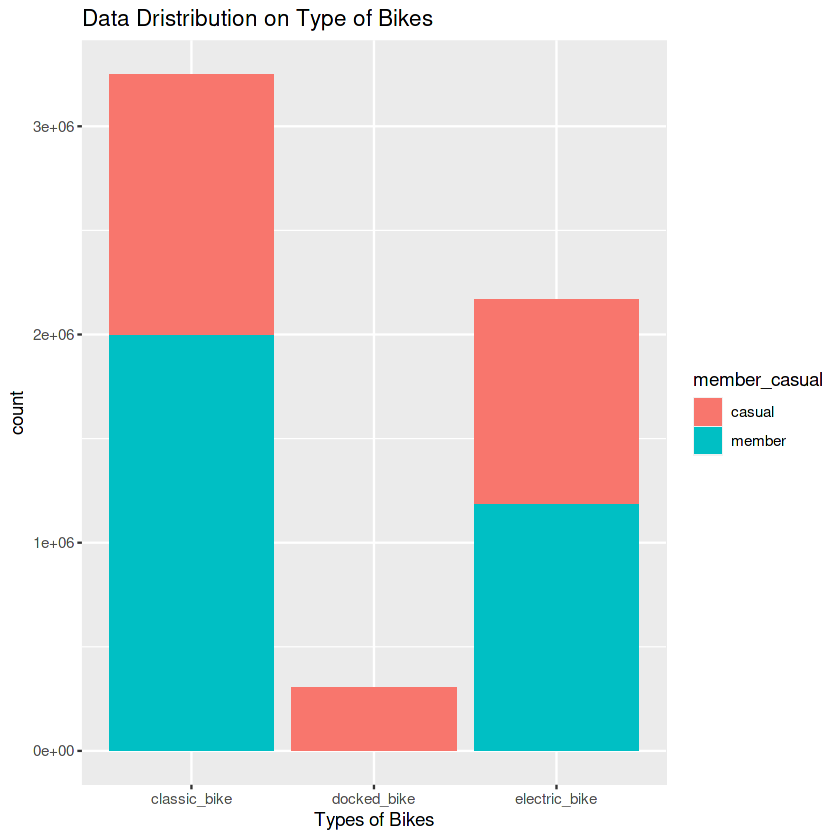

In [19]:
# Now lets plot the bar chart for clear understanding of riding distribution pattern on types of bikes.
ggplot(combined_cyclistic, aes(rideable_type, fill = member_casual)) +
geom_bar() + labs(x = "Types of Bikes", title = "Data Dristribution on Type of Bikes")

# > *It's important to note that:*
* ***Classic bikes have the biggest volume of rides, but this can be that the company may have more classic bikes.***
* ***Members have a bigger preference for classic bikes, approx 23% more.***
* ***Also for electric bikes.***



# > *Now lets get a closer look on some other variables in the dataset.*
> ***ride_time***

In [20]:
# Get the summarized statistics of ride_time for clear understaing.
summary(combined_cyclistic$ride_time)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -58.03     6.57    11.72    21.54    21.33 55944.15 

* ***It's worth noticing that the minimum value is negative and the maximum value is far more.***
* ***As we know that time cannot be negativw and no one can ride the the bike for several days.***
* ***This obvious that some station may have taken wrong readings.***
* ***In that case here the outliners can play a huge role in tha alalysis.***

In [21]:

ventiles = quantile(combined_cyclistic$ride_time, seq(0, 1, by=0.05))
ventiles

0%       5%      10%      15%      20%      25%      30%      35% 
  -58.03     2.73     3.88     4.82     5.70     6.57     7.47     8.42 
     40%      45%      50%      55%      60%      65%      70%      75% 
    9.43    10.52    11.72    13.07    14.62    16.43    18.62    21.33 
     80%      85%      90%      95%     100% 
   24.82    29.48    36.98    54.62 55944.15

# > *We can see that:*
* ***The difference between 0% and 100% is 87770.0 minutes.***
* ***The difference between 5% and 95% is 69.95 minutes. Because of that, in the analysis of this variable we are going to use a subset of the dataset without outliners.***
* ***The subset will contain 95% of the dataset.***



In [22]:
# We have only using 95% of the dataset so now we have to remove the outliers.
combined_cyclistic_no_outlier <- combined_cyclistic %>%
filter(ride_time > as.numeric(ventiles["5%"])) %>%
filter(ride_time < as.numeric(ventiles["95%"]))

In [23]:
# Now summarize the ride_time to get the clear understanding.
combined_cyclistic_no_outlier %>%
group_by(member_casual) %>%
summarise(average_ride_time = mean(ride_time))

member_casual,average_ride_time
<chr>,<dbl>
casual,17.87754
member,12.84800


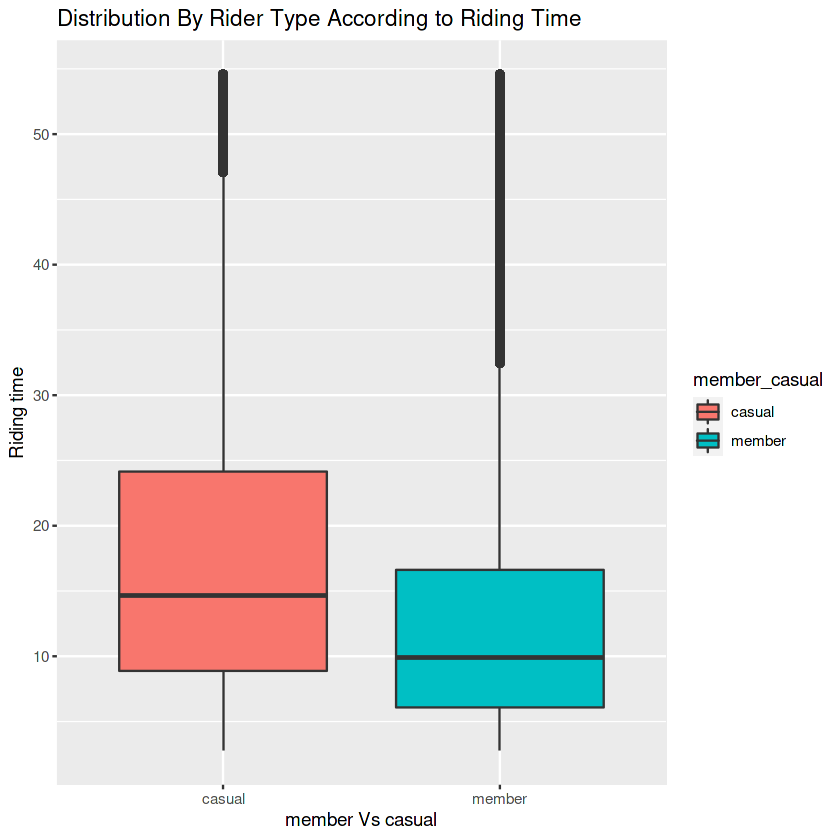

In [24]:
# Now lets plot the chart for clear understanding of rider distribution pattern on member types with respect to riding time .
ggplot(combined_cyclistic_no_outlier, aes(x = member_casual, y = ride_time, fill = member_casual)) + 
geom_boxplot() + 
labs(x = "member Vs casual", y = "Riding time", title = "Distribution By Rider Type According to Riding Time")

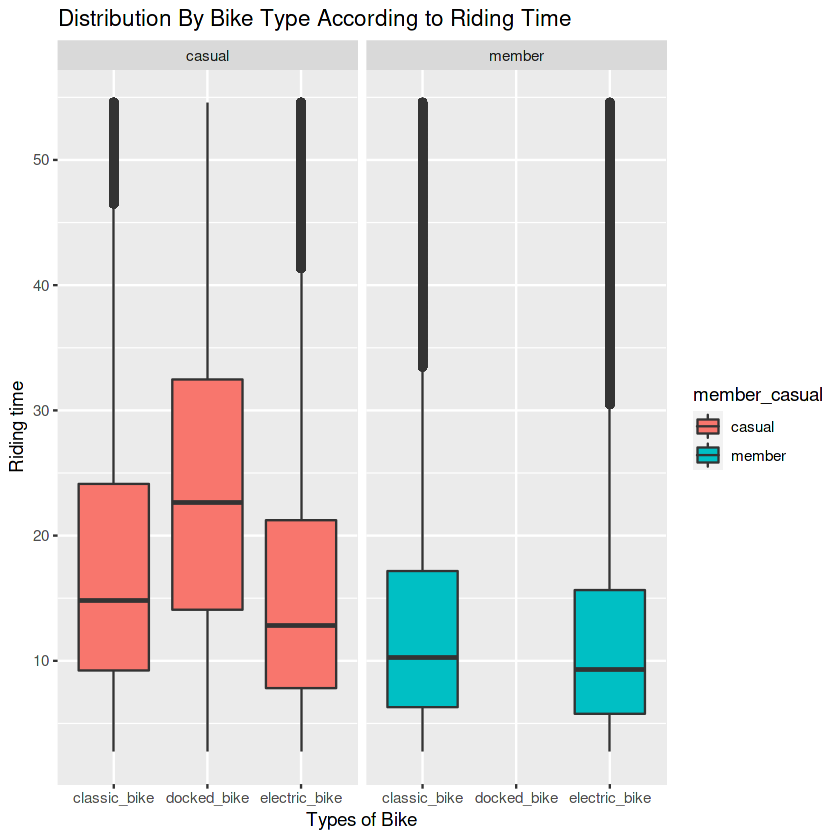

In [25]:
# Again plot the bar chart for clear understanding of rider distribution pattern on bike types with respect to riding time .
ggplot(combined_cyclistic_no_outlier, aes(x = rideable_type, y = ride_time, fill = member_casual)) + 
geom_boxplot() + 
labs(x = "Types of Bike", y = "Riding time", title = "Distribution By Bike Type According to Riding Time") + facet_wrap(~ member_casual)

# > *It's interesting to see:*
* ***Casual riders have more riding time than the member riders.***
* ***Average ride time is also bigger for casual riders.***
* ***Electric bikes have less riding time than other bikes, for both member riders and casual riders.***
* ***Docked bikes have more riding time.***
* ***Member riders don't use docked bike.***



***Guiding questions:***

> ***How should we organize ours data to perform analysis on it?***

The data has been organized into a single .CSV format concatenating all the files from the dataset.

> ***Has our data been properly formatted?***

Yes, all the columns have their correct data type.

> ***What surprises did we discover in the data?***

One of the main surprises is how member riders differ from casual riders when analysed from weekdays. Also that members have less riding time than casuals.

> ***What trends or relationships did we find in the data?***
        
* ***There are more annual members than casual riders using the bikes.***
* ***The average ride time of casual riders is more comapred to annual members.***
* ***The number of casual riders increases on week-ends compared to week-days.***
* ***The evening rush hour especially the 5 pm has the most number of users during the entire day.** *
* ***The classic bike is still most preferred.***

> ***How will these insights help answer our business questions?***

***These insights helps to build a profile for members.***

> # **Share**

***The share phase is usually done by building a presentation. But for kaggle, the best representation of the analysis and conclusions is it's own notebook.***

***What we know about the dataset:***

* Members have the biggest proportion of the dataset, ~10% bigger than casuals.
* The biggest volume of data is on the the weekend.
* There's a bigger volume of bikers in the afternoon.
* Members may have the biggest volume of data, except saturday and sunday. On weekands, casual riders having the most data points.
* Weekends have the biggest volume of casual riders, starting on saturday, a ~12% increase.
* We have more members during the morning, mainly between 5am and 12pm. And more casuals between 11pm and 4am.
* There's a big increase of data points in the workdays between 5am to 8am for members. Then it fell a bit. Another big increase is from 5pm to 6pm.
* During the weekend we have a bigger flow of casuals between 11am to 6pm.
* Members have a bigger preference for classic bikes, ~23% more.
* Casuals have more riding time than members.
* Riding time for members keeps unchanged during the workdays.
* Casuals follow a more curve distribution, peaking on saturday.

**We can say that members have a more fixed use for bikes besides casuals. They use it for more routine activities, like:**
* Go to work.
* Use it as an exercise.

**This can be proven as we seen the data viz we have more members in between 6am to 8am and at 5pm to 6pm. Also, members may have set routes when using the bikes, as proven by riding time for members keeps unchanged during the workdays and increased during weekends. Members also have a bigger preference for classic bikes, so they can exercise when going to work.**

***Guiding questions:***

> ***Were we able to answer the question of how annual members and casual riders use Cyclistic bikes differently?***

Yes, The data points have several differences between casuals and members.

> ***What story does our data tell?***

The main story the data tells us that members have set schedules and use the bikes for routine activities such as going to work. Data viz also point out that they have less riding time, because they have a set route to take.

> ***How do our findings relate to our original question?***

The findings build a profile "what's the key differences between casuals and annual riders", and how they use bikes helps us find "How digital media could influence them".

> ***Who is our audience? What is the best way to communicate with them?***

The main target audience is my cyclistic marketing analytics team and Lily Moreno. The best way to communicate is through a slide presentation of the findings.

> ***Can data visualization help us share our findings?***

Yes, the main core of the finds is through data visualization.

> ***Is our presentation accessible to our audience?***

Yes, the plots were made using vibrant colors, and corresponding labels.



> # **Act**

***The act phase would be done by the marketing team of the company.***

> **The main takeaway will be our top three recommendations based on our analysis for the marketing:**

* ***Build a marketing campaign focusing on how bikes help people to get to fit as well as the best commuting option considring world polution in mind.***
* ***Coupons and discounts could be handed out to increase benefits for riding . .***
* ***The ads could focus on how practical and consistent the bikes can be.***

***Guiding questions:***

> ***What is our final conclusion based on our analysis?***

Members and casual have different habits when using the bikes.

> ***How could our team and business apply our insights?***

The insights could be implemented when preparing a marketing campaign for turning casual into members. The marketing can have a focus on workers as a green way to get to work.

> ***What next steps would us or our stakeholders take based on our findings?***

Further analysis could be done to improve the findings, besides that, the marketing team can take the main information to build a marketing campaign.

> ***Is there additional data you could use to expand on your findings?***

* Mobility data.
* More information about members.

> # **Conclusion**

***This case study teachs me a lot how to approch the data for the analysis and the R language is really useful for analysing data (although I prefer using Python). This took me more time than I expected, but it was fun.***